# DTSA 5510 Unsupervised Algorithms in Machine Learning Final Project

## Project Topic
### This project utilizes a dataset containing attributes of beans that are classified into 7 different types. It is a classic classification problem, so our supervised learning techniques will come in handy, along with new unsupervised techniques. Basically, our goal is to create different models to achieve the greatest level of accuracy when predicting which type of bean we have based on its attribute values.

## Data
### The data was obtained from the UCI Machine Learning Repository in a dataset known as "Dry Bean". The data was obtained using a computer vision system to analyze photographs of various bean grains (seeds) and quantify various measurements of the grain. There are a total of 13,611 instances of grains, and they are described using 16 integer or continuous features, 12 of which describe dimensions of the grain, while the remaining 4 describe its shape. Citation for the data is as follows: Dry Bean. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("Dry_Bean_Dataset.xlsx")

print(df.head())
print("\n")
print(f"Shape of data: {df.shape}")

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

## Data Cleaning and Exploratory Data Analysis
### The data itself came pretty much completely clean, with no NA values or values of 0.0. I was worried about 0.0 values because judging by the meanings of the different factors, a value of 0.0 would not make sense for any of them, and would likely mean missing data. Histograms to show the distributions of each factor are included below, and we can see that many of them share similar distributions with one another, which will be expanded upon in the next section of cells. We can see that many of the distributions are skewed, but none of the values that seem like they could be outliers are outside the supposed limits of possible values.

Does our data have any 0 values: False

Does our data have any NA values: False



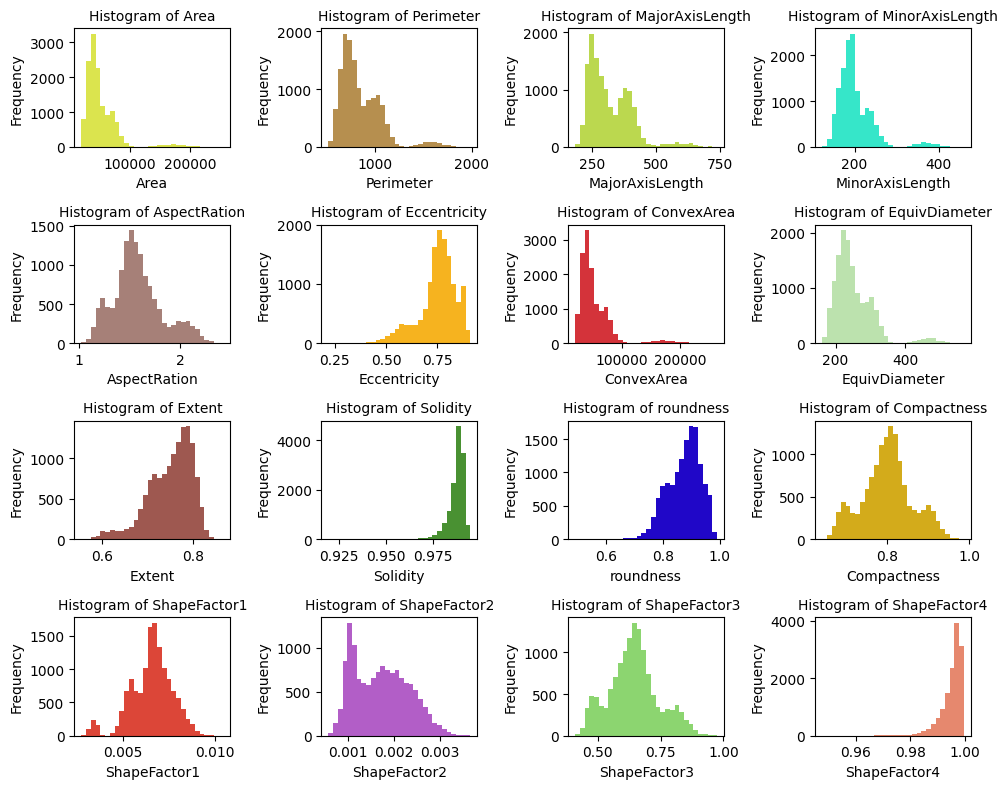

In [2]:
import matplotlib.pyplot as plt
import random

print(f"Does our data have any 0 values: {np.any(df.values == 0)}\n")
print(f"Does our data have any NA values: {bool(df.isna().sum().sum())}\n")

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, factor in enumerate(df.columns):
    if df[factor].dtype in ["int64", "float64"]:
        ax = axes[i]
        color = (random.random(), random.random(), random.random())
        ax.hist(df[factor], color=color, bins=30)
        ax.set_title(f"Histogram of {factor}", fontsize=10)
        ax.set_xlabel(f"{factor}")
        ax.set_ylabel("Frequency")
        ax.grid(False)

plt.tight_layout()
plt.show()

### I conducted correlation analysis in this section using a correlation matrix, and we can see that a number of factors show strong negative or positive correlations with one another. I noticed that the factors "ConvexArea" and "Compactness" were particularly problematic in terms of strong negative and positive correlations, so I decided to drop them from the dataframe and ended up with better accuracy scores when training my models.

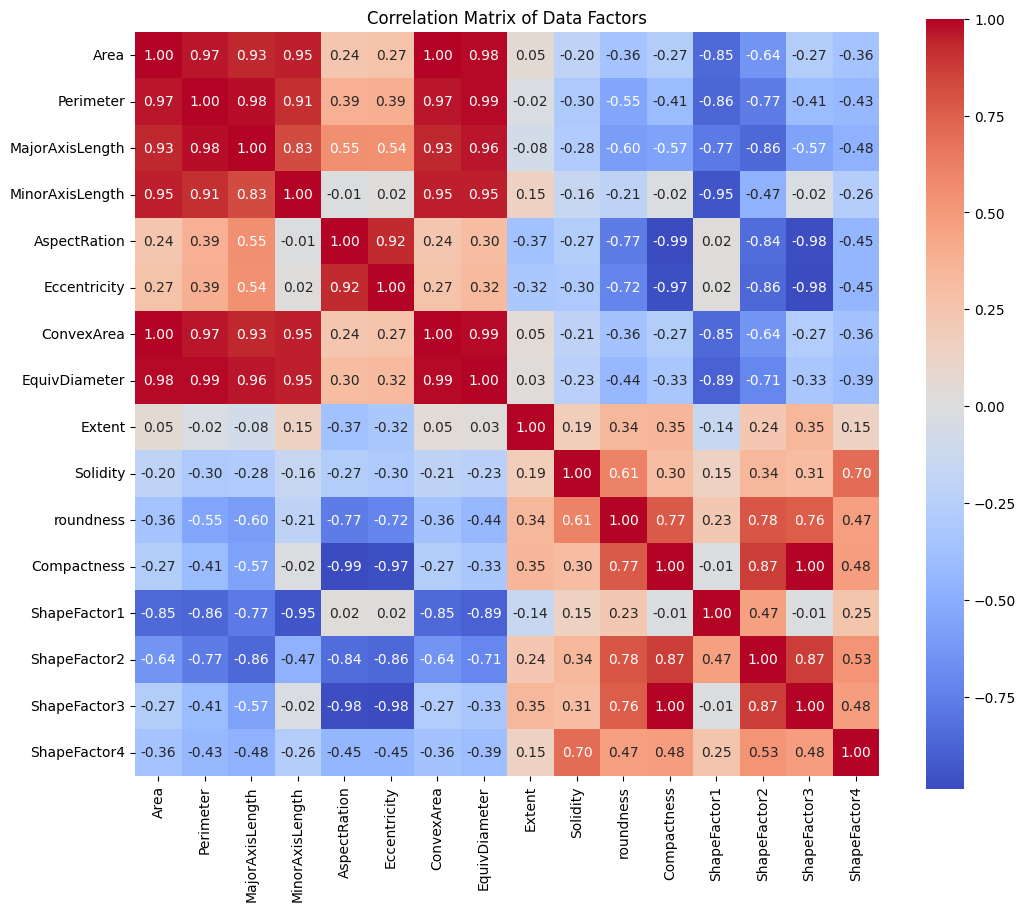

In [3]:
import seaborn as sns

cor = df.drop("Class", axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Data Factors")
plt.show()

df.drop(["ConvexArea", "Compactness"], axis=1, inplace=True)

## Models
### For my first model, I went with a classic supervised learning model that is well-equipped to handle classification problems. For my logistic regression model, I experimented with a number of different values for the "C" and "max_iter" hyperparameters and ended up with some fairly high accuracy scores against my test data. It's worth noting that most of those hyperparameter combinations result in long execution times when training the model.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time 

y = df["Class"]
x = df.drop("Class", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)

def runlogreg(C, max_iter):
    print(f"\nTraining Logistic Regression model with hyperparameters C={C} and max_iter={max_iter}\n")
    time1 = time.time()
    logreg = LogisticRegression(C=C, max_iter=max_iter).fit(x_train, y_train)
    print(f"Time spent training model: {time.time() - time1:.2f} seconds\n")
    y_pred = logreg.predict(x_test)
    print(f"Accuracy score for test data: {accuracy_score(y_test, y_pred):.4f}\n")

runlogreg(0.5, 1000)
runlogreg(1, 10000)
runlogreg(1, 100000)
runlogreg(10, 100000)


Training Logistic Regression model with hyperparameters C=0.5 and max_iter=1000

Time spent training model: 1.62 seconds

Accuracy score for test data: 0.9041


Training Logistic Regression model with hyperparameters C=1 and max_iter=10000

Time spent training model: 16.03 seconds

Accuracy score for test data: 0.9144


Training Logistic Regression model with hyperparameters C=1 and max_iter=100000

Time spent training model: 22.35 seconds

Accuracy score for test data: 0.9199


Training Logistic Regression model with hyperparameters C=10 and max_iter=100000

Time spent training model: 22.33 seconds

Accuracy score for test data: 0.9144



### For my second model, I went with the K-means clustering unsupervised learning model, which I felt would be perfectly suited to the task due to the fact that there are only 7 different class labels and thus only 7 clusters would be required when training a model. This resulted in blazingly fast execution times when training the model, and I was able to achieve an "accuracy score" nearly as good as with the slower logistic regression model. Obviously, there are no resulting "labels" to judge accuracy when performing unsupervised clustering, so I had to figure out my own method. I took the most common clustering label for each class, then computed an accuracy based on how many clustering labels fit that most common label for each class, then computed an overall weighted average based on the counts of each class in the data. This algorithm ran so quickly that I was able to perform 5 separate trials and compute an average weighted accuracy score for my clustering.

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def runkmeans():
    x = df.drop("Class", axis=1)
    ss = StandardScaler()
    x_s = ss.fit_transform(x)
    time1 = time.time()
    kmeans = KMeans(n_clusters=7, random_state=64).fit(x_s)
    print(f"\nTime spent training model: {time.time() - time1:.2f} seconds\n")
    df["Cluster"] = kmeans.labels_
    
    common_clusters = df.groupby("Class")["Cluster"].agg(lambda x: x.mode()[0])
    class_accs = df.groupby("Class").apply(lambda x: (x["Cluster"] == common_clusters.loc[x.name]).sum() / len(x))
    
    weights = df["Class"].value_counts(normalize=True)
    weighted_acc = (class_accs * weights).sum()
    
    print("Local accuracy for each Class value:\n")
    print(class_accs)
    print(f"\nOverall weighted accuracy: {weighted_acc:.4f}\n")

    return weighted_acc

s = 0
for i in range(5):
    s += runkmeans()
print(f"Average weighted accuracy across 5 trials: {s / 5}")


Time spent training model: 0.11 seconds

Local accuracy for each Class value:

Class
BARBUNYA    0.871407
BOMBAY      0.996169
CALI        0.800000
DERMASON    0.807671
HOROZ       0.849066
SEKER       0.922546
SIRA        0.894158
dtype: float64

Overall weighted accuracy: 0.8599


Time spent training model: 0.01 seconds

Local accuracy for each Class value:

Class
BARBUNYA    0.871407
BOMBAY      0.996169
CALI        0.800000
DERMASON    0.807671
HOROZ       0.849066
SEKER       0.922546
SIRA        0.894158
dtype: float64

Overall weighted accuracy: 0.8599


Time spent training model: 0.01 seconds

Local accuracy for each Class value:

Class
BARBUNYA    0.871407
BOMBAY      0.996169
CALI        0.800000
DERMASON    0.807671
HOROZ       0.849066
SEKER       0.922546
SIRA        0.894158
dtype: float64

Overall weighted accuracy: 0.8599


Time spent training model: 0.01 seconds

Local accuracy for each Class value:

Class
BARBUNYA    0.871407
BOMBAY      0.996169
CALI        0.800000

## Results and Analysis
### As we've seen above, the logistic regression model was able to compute a slighter higher accuracy score on average compared to the k-means clustering model. However, it took significantly longer to run the training for this model, so the results presented by the unsupervised model are very impressive.

## Discussion and Conclusion
### The results of this project have shown some exciting potential conclusions. It has been shown that, while not the most accurate possible method of performing classification, the k-means clustering unsupervised learning model shows great potential when we are able to design algorithms to essentially map its labels back to the real classes they portray. Additionally, I found that dropping factors that show high collinearity with others can result in higher accuracy scores due to less overfitting.

GitHub link: https://github.com/mwcarlson/DS_ML_USL_FP
Link to data: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset